Generating random values for the volume function over time didnt work yet, because the function depends basically not on a constant parameter, but on the total feed into the reactor, which doesnt have a pattern or constant value. 

--> next approach: try with CO2, because here i have Yco2/x as a constant, that i could change randomly. 

In [1]:
import numpy as np
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
from E_model import model_S_no2
from E_model import show_plot_no2

pd.options.mode.chained_assignment = None  # Suppress the warning

In [2]:
# Load parameters from YAML file
with open('config/parameters.yml', 'r') as file:
    param = yaml.safe_load(file)

set1 = param['set_part1']
set2 = param['set_part2']

In [3]:
df_exp = pd.read_csv('data/batch_no2/data_combined.csv')

In [4]:
num_samples = 500

# Bounds for the distribution
lb = 0.75
ub = 1.25

p1 = set1
print(p1)

Yxs_dist = np.random.normal(p1[0], ((ub*p1[0] - lb*p1[0]) / 4), num_samples)
Yco2s_dist = np.random.normal(p1[1], ((ub*p1[1] - lb*p1[1]) / 4), num_samples)
qs_max_dist = np.random.normal(p1[2], ((ub*p1[2] - lb*p1[2]) / 4), num_samples)
Ks_dist = np.random.normal(p1[3], ((ub*p1[3] - lb*p1[3]) / 4), num_samples)
m_s_dist = np.random.normal(p1[4], ((ub*p1[4] - lb*p1[4]) / 4), num_samples)
lag_dist = np.random.normal(p1[5], ((ub*p1[5] - lb*p1[5]) / 4), num_samples)

df_p1 = pd.DataFrame({
    'Yxs': Yxs_dist,
    'Yco2s': Yco2s_dist,
    'qs_max': qs_max_dist,
    'Ks': Ks_dist,
    'm_s': m_s_dist,
    'lag': lag_dist})

df_p1.describe()

[0.554746, 0.003358, 1.276025, 0.687328, 0.034399, 0.226874]


,Yxs,Yco2s,qs_max,Ks,m_s,lag
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.555070,0.003351,1.285984,0.681773,0.034481,0.227377
std,0.069342,0.000439,0.162035,0.086545,0.004227,0.028051
min,0.327885,0.002123,0.797707,0.383358,0.020495,0.140834
25%,0.506589,0.003032,1.174330,0.626608,0.031828,0.208525
50%,0.554177,0.003368,1.287213,0.680885,0.034356,0.227078
75%,0.597832,0.003635,1.398305,0.741416,0.037040,0.246510
max,0.747628,0.004704,1.812474,0.938338,0.047624,0.303978


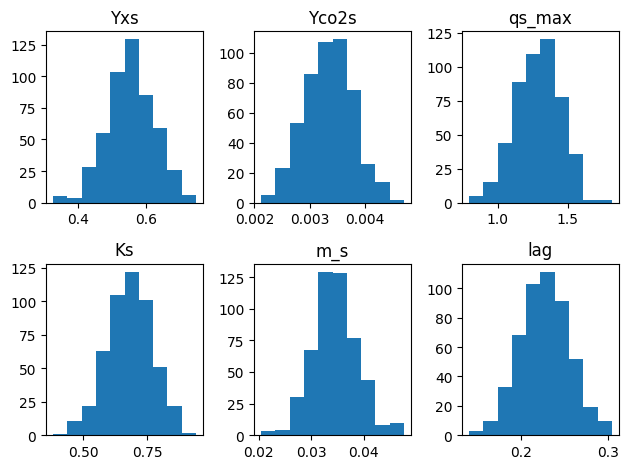

In [5]:
# check if there are enough samples to have a normal distribution
fig, ax = plt.subplots(2, 3)
ax[0,0].hist(df_p1['Yxs'])
ax[0,0].set_title('Yxs')
ax[0,1].hist(df_p1['Yco2s'])
ax[0,1].set_title('Yco2s')
ax[0,2].hist(df_p1['qs_max'])
ax[0,2].set_title('qs_max')
ax[1,0].hist(df_p1['Ks'])
ax[1,0].set_title('Ks')
ax[1,1].hist(df_p1['m_s'])
ax[1,1].set_title('m_s')
ax[1,2].hist(df_p1['lag'])
ax[1,2].set_title('lag')
plt.tight_layout()

In [6]:
num_samples = 500

# Bounds for the distribution
lb = 0.75
ub = 1.25

p2 = set2
print(p2)

Yxs_dist = np.random.normal(p2[0], ((ub*p2[0] - lb*p2[0]) / 4), num_samples)
Yco2s_dist = np.random.normal(p2[1], ((ub*p2[1] - lb*p2[1]) / 4), num_samples)
qs_max_dist = np.random.normal(p2[2], ((ub*p2[2] - lb*p2[2]) / 4), num_samples)
Ks_dist = np.random.normal(p2[3], ((ub*p2[3] - lb*p2[3]) / 4), num_samples)
m_s_dist = np.random.normal(p2[4], ((ub*p2[4] - lb*p2[4]) / 4), num_samples)
lag_dist = np.random.normal(p2[5], ((ub*p2[5] - lb*p2[5]) / 4), num_samples)

df_p2 = pd.DataFrame({
    'Yxs': Yxs_dist,
    'Yco2s': Yco2s_dist,
    'qs_max': qs_max_dist,
    'Ks': Ks_dist,
    'm_s': m_s_dist,
    'lag': lag_dist})

df_p2.describe()

[0.843, 0.0048, 2.166, 0.527, 0.045, 0.0]


,Yxs,Yco2s,qs_max,Ks,m_s,lag
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,0.842670,0.004820,2.174313,0.528662,0.044814,0.0
std,0.108428,0.000562,0.275094,0.068190,0.005800,0.0
min,0.513884,0.003477,1.280075,0.299254,0.028536,0.0
25%,0.768687,0.004398,1.977796,0.482312,0.040863,0.0
50%,0.846766,0.004802,2.163949,0.526932,0.045135,0.0
75%,0.912893,0.005234,2.375427,0.575528,0.048858,0.0
max,1.165730,0.006308,3.014538,0.738143,0.061169,0.0


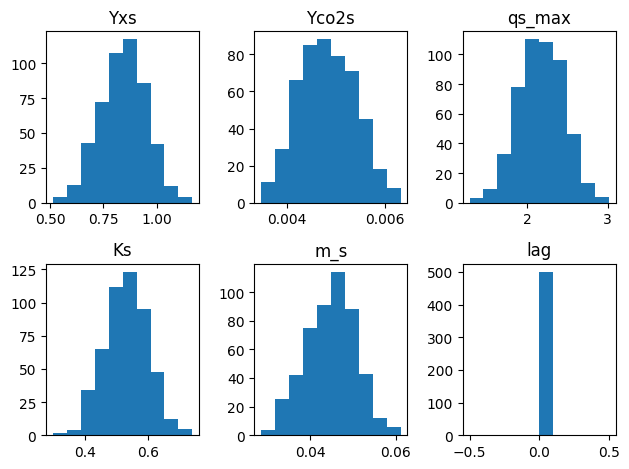

In [7]:
# check if there are enough samples to have a normal distribution
fig, ax = plt.subplots(2, 3)
ax[0,0].hist(df_p2['Yxs'])
ax[0,0].set_title('Yxs')
ax[0,1].hist(df_p2['Yco2s'])
ax[0,1].set_title('Yco2s')
ax[0,2].hist(df_p2['qs_max'])
ax[0,2].set_title('qs_max')
ax[1,0].hist(df_p2['Ks'])
ax[1,0].set_title('Ks')
ax[1,1].hist(df_p2['m_s'])
ax[1,1].set_title('m_s')
ax[1,2].hist(df_p2['lag'])
ax[1,2].set_title('lag')
plt.tight_layout()

In [8]:
# Set the noise parameters
mean = 0  # Mean of the noise
std_dev = 0.1  # Standard deviation of the noise
std_dev_co2 = 0.001  # Standard deviation of the noise

In [9]:
# define sample frequency
# --> higher frequency reduces the amount of data that has to be stored (less data points)
delta_t = 2 #min

df_batches = pd.DataFrame()
for i in range(df_p1.shape[0]):
    batch_id = str(i).zfill(3)
    set1 = list(df_p1.iloc[i])
    set2 = list(df_p2.iloc[i])
    df = model_S_no2(set1, set2, delta_t)
    df['batch_id'] = str(batch_id)
    
    # Add noise to the 'biomass' column
    noise_biomass = np.random.normal(mean, std_dev, df.shape[0])
    df['biomass'] += noise_biomass

    # Add noise to the 'co2' column
    noise_co2 = np.random.normal(mean, std_dev_co2, df.shape[0])
    df['co2'] += noise_co2
    
    # Add noise to the 'glucose' column
    noise_glucose = np.random.normal(mean, std_dev, df.shape[0])
    df['glucose'] += noise_glucose

    df_batches = pd.concat([df_batches, df], ignore_index=True)

df_batches.to_csv('data/batch_no2/generated data/df_gen_co2_2.csv')

In [10]:
df_gen = pd.read_csv('data/batch_no2/generated data/df_gen_co2_2.csv')
df_gen.drop(['Unnamed: 0'], axis=1, inplace=True)
df_gen['batch_id'] = df_gen['batch_id'].astype(str).str.zfill(3)

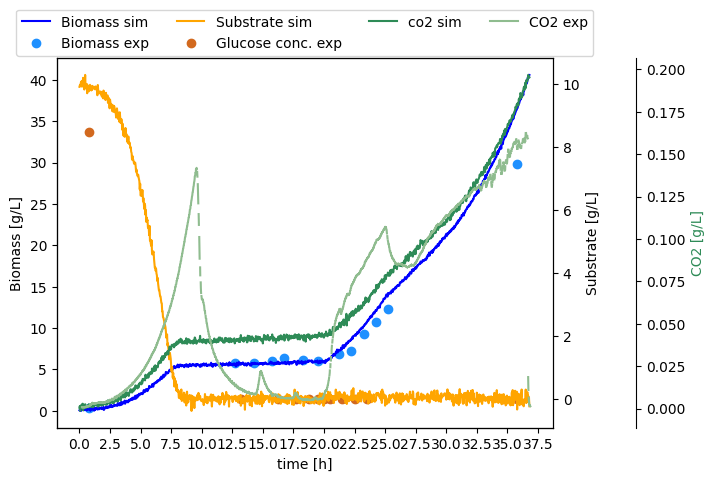

In [17]:
df_one = df_gen[df_gen['batch_id'] == '001']
show_plot_no2(df_one)

In [12]:
# biomass
df_X = df_gen.copy().drop(['glucose', 'co2'], axis=1)
sorted_X = df_X.groupby('batch_id')['biomass'].max().sort_values(ascending=False).index
df_X['batch_id'] = pd.Categorical(df_X['batch_id'], categories=sorted_X, ordered=True)
df_X = df_X.sort_values(['batch_id', 'time'], ascending=[True, True])

# glucose
df_S = df_gen.copy().drop(['biomass', 'co2'], axis=1)
sorted_S = df_S.groupby('batch_id')['glucose'].max().sort_values(ascending=False).index
df_S['batch_id'] = pd.Categorical(df_S['batch_id'], categories=sorted_S, ordered=True)
df_S = df_S.sort_values(['batch_id', 'time'], ascending=[True, True])

# co2
df_co2 = df_gen.copy().drop(['biomass', 'glucose'], axis=1)
sorted_qs = df_co2.groupby('batch_id')['co2'].max().sort_values(ascending=False).index
df_co2['batch_id'] = pd.Categorical(df_co2['batch_id'], categories=sorted_qs, ordered=True)
df_qs = df_co2.sort_values(['batch_id', 'time'], ascending=[True, True])

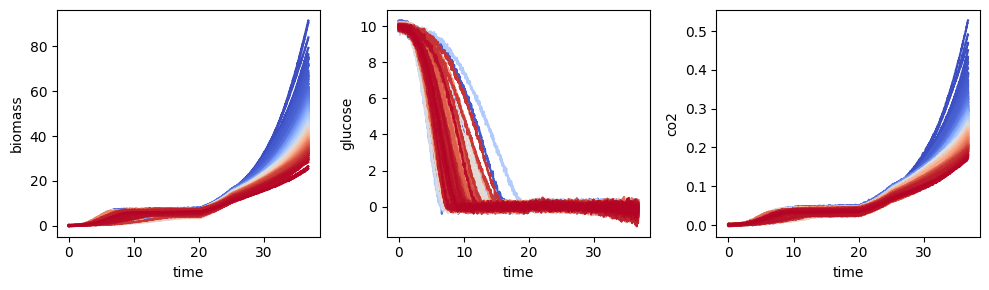

In [13]:
# Rainbow palette: Spectral
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

sns.lineplot(ax=ax[0], data=df_X, x='time', y='biomass', hue='batch_id', palette='coolwarm', legend=False)
sns.lineplot(ax=ax[1], data=df_S, x='time', y='glucose', hue='batch_id', palette='coolwarm', legend=False)
sns.lineplot(ax=ax[2], data=df_co2, x='time', y='co2', hue='batch_id', palette='coolwarm', legend=False)

plt.tight_layout()
plt.show()